<center><img src='https://cdn-images-1.medium.com/max/1600/1*3Q2EzYMZVBEKbY0gkd5oeg.jpeg'/> </center>

What is Tensorflow?

Tensorflow is Deeplearning framework from Google with a very huge stack. Google uses it almost in very application.
It also runs on many devices CPU, GPU, TPU, Android, IOS, Embedded devices.

So what is Keras? Keras is high level API which allows us build neural networks by stacking building blocks on top of eachother. Keras uses a lot of different libraries to run on top of such as Tensorflow, CNTK, MaxNet, etc

Tensorflow now also include Keras as tf.keras package. So we can either use Keras as a separate library or we can use tf.keras which will be pretty much the same as using Keras itself

Back in the days when you wanted to use Tensorflow you would write smth like this

In [1]:
# # tf Graph input
# X = tf.placeholder("float", [None, num_input])
# Y = tf.placeholder("float", [None, num_classes])

# # Store layers weight & bias
# weights = {
#     'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
#     'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
#     'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
# }
# biases = {
#     'b1': tf.Variable(tf.random_normal([n_hidden_1])),
#     'b2': tf.Variable(tf.random_normal([n_hidden_2])),
#     'out': tf.Variable(tf.random_normal([num_classes]))
# }


# # Create model
# def neural_net(x):
#     # Hidden fully connected layer with 256 neurons
#     layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
#     # Hidden fully connected layer with 256 neurons
#     layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
#     # Output fully connected layer with a neuron for each class
#     out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
#     return out_layer

# # Construct model
# logits = neural_net(X)
# prediction = tf.nn.softmax(logits)

# # Define loss and optimizer
# loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
#     logits=logits, labels=Y))
# optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
# train_op = optimizer.minimize(loss_op)

# # Evaluate model
# correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# # Initialize the variables (i.e. assign their default value)
# init = tf.global_variables_initializer()

# # Start training
# with tf.Session() as sess:

#     # Run the initializer
#     sess.run(init)

#     for step in range(1, num_steps+1):
#         batch_x, batch_y = mnist.train.next_batch(batch_size)
#         # Run optimization op (backprop)
#         sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
#         if step % display_step == 0 or step == 1:
#             # Calculate batch loss and accuracy
#             loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
#                                                                  Y: batch_y})
#             print("Step " + str(step) + ", Minibatch Loss= " + \
#                   "{:.4f}".format(loss) + ", Training Accuracy= " + \
#                   "{:.3f}".format(acc))

#     print("Optimization Finished!")

#     # Calculate accuracy for MNIST test images
#     print("Testing Accuracy:", \
#         sess.run(accuracy, feed_dict={X: mnist.test.images,
# Y: mnist.test.labels}))

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
print('Train data size ', x_train.shape)
print('Train label size', y_train.shape)

Train data size  (60000, 28, 28)
Train label size (60000,)


In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Before we start training our model we, first, should add more settings for it. This is done during model compile step.

In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(), # this update the weights of our model
              loss='sparse_categorical_crossentropy',  # this mesures how accurate our model during training
              metrics=['acc']) # this used for monitoring the training and testing steps

In [11]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.5188 - acc: 0.8191
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3926 - acc: 0.8600
Epoch 3/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3517 - acc: 0.8731
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3259 - acc: 0.8822
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3084 - acc: 0.8870
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2961 - acc: 0.8909
Epoch 7/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2824 - acc: 0.8964
Epoch 8/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2741 - acc: 0.8988
Epoch 9/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2653 - acc: 0.9011
Epoch 10/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2567 - acc: 0.9052

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/step
Test accuracy: 0.877


Having trained our neural network, we can start making predictions

In [13]:
predictions = model.predict(x_test)

In [14]:
np.argmax(predictions[0])

9

In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

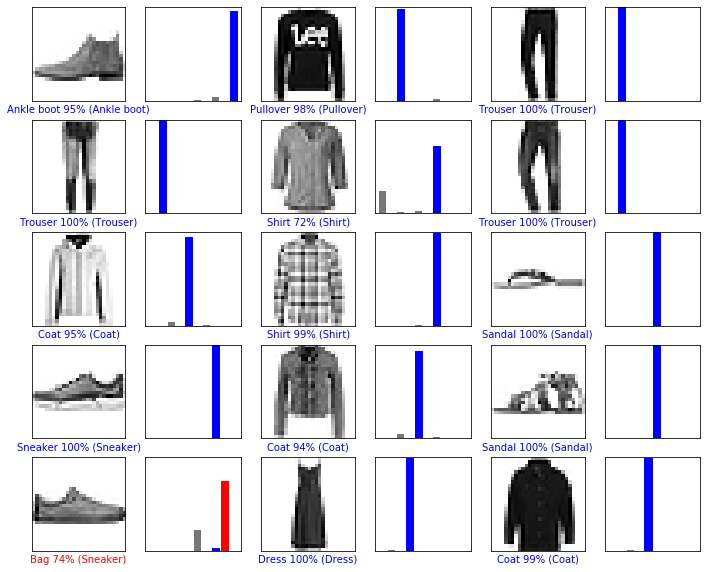

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)
plt.show()

### Exercise

So let's try to play with this model and see if you can make it better than it is. Try to add more layer or change the number epochs.

### Text classification

Let's try to solve a text classification problem by using tensorflow. Tensorflow comes with prepackaged IMDB dataset. It's already preprocessed such that the reviews which are sequences of words converted to integers where each integer represents a word

Let's first download the dataset

In [17]:
imdb = keras.datasets.imdb

# num_words = 10000 keeps top 10000 most frequently used words

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=10000)

In [18]:
print("Dataset size {}, labels {}".format(len(train_x), len(train_y)))

Dataset size 25000, labels 25000


Each review has different length

In [19]:
print(len(train_x[0]), len(train_x[34]))

218 597


So, how can we understand which number represents what word?

In [20]:
word_index = imdb.get_word_index()

In [21]:
# first indecies are reserved
word_index = {i: (j + 3) for i, j in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decode_index = lambda x: ' '.join([reverse_word_index.get(i, '?') for i in x])

In [22]:
decode_index(train_x[2])

"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life"

The reviews are arrays of integers. They must be converted to tensors before we feed them into the NN.

In [23]:
train_x = keras.preprocessing.sequence.pad_sequences(train_x, 
                                                        value=word_index['<PAD>'], 
                                                        padding='post', 
                                                        maxlen=256)
test_x = keras.preprocessing.sequence.pad_sequences(test_x, 
                                                       value=word_index['<PAD>'], 
                                                       padding='post', 
                                                       maxlen=256)

In [24]:
print(len(train_x[0]), len(train_x[34]))

256 256


In [25]:
print(train_x[2])

[   1   14   47    8   30   31    7    4  249  108    7    4 5974   54
   61  369   13   71  149   14   22  112    4 2401  311   12   16 3711
   33   75   43 1829  296    4   86  320   35  534   19  263 4821 1301
    4 1873   33   89   78   12   66   16    4  360    7    4   58  316
  334   11    4 1716   43  645  662    8  257   85 1200   42 1228 2578
   83   68 3912   15   36  165 1539  278   36   69    2  780    8  106
   14 6905 1338   18    6   22   12  215   28  610   40    6   87  326
   23 2300   21   23   22   12  272   40   57   31   11    4   22   47
    6 2307   51    9  170   23  595  116  595 1352   13  191   79  638
   89    2   14    9    8  106  607  624   35  534    6  227    7  129
  113    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

Let's build our model.

As we saw earlier NN is a stack of layers. So when we are building our model we have to make several decisions: 
1. How many layers?
2. How many hidden units to use for each layer?

In [26]:
voc_size = 10000

model = keras.Sequential([
    keras.layers.Embedding(voc_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation = tf.nn.relu),
    keras.layers.Dense(1, activation= tf.nn.sigmoid)
])

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


Next step, we should define a loss function and optimizer for our model. Since this is a binary classification problem and the model outputs the probability we can use binary_crossentropy loss function which is better for dealing with probabilities than mean_squared_error

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

Let's also create a validation set which allows to test our model on the data that it hasn't seen before

In [29]:
val_x = train_x[:10000]
x_train = train_x[10000:]

val_y = train_y[:10000]
y_train = train_y[10000:]

Having preprocessed our data, splited it into train, test, and validation sets we can start training our model

In [30]:
history = model.fit(x_train,
                   y_train,
                   epochs=30,
                   batch_size=256,
                   validation_data=(val_x, val_y),
                   verbose=1)

/home/troy/anaconda3/envs/cv_proj/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 0s 31us/step - loss: 0.6905 - acc: 0.6322 - val_loss: 0.6851 - val_acc: 0.7349
Epoch 2/30
15000/15000 [==============================] - 0s 12us/step - loss: 0.6699 - acc: 0.7532 - val_loss: 0.6515 - val_acc: 0.7680
Epoch 3/30
15000/15000 [==============================] - 0s 12us/step - loss: 0.6144 - acc: 0.7922 - val_loss: 0.5822 - val_acc: 0.7792
Epoch 4/30
15000/15000 [==============================] - 0s 12us/step - loss: 0.5276 - acc: 0.8247 - val_loss: 0.4967 - val_acc: 0.8237
Epoch 5/30
15000/15000 [==============================] - 0s 12us/step - loss: 0.4383 - acc: 0.8583 - val_loss: 0.4239 - val_acc: 0.8477
Epoch 6/30
15000/15000 [==============================] - 0s 12us/step - loss: 0.3684 - acc: 0.8777 - val_loss: 0.3746 - val_acc: 0.8588
Epoch 7/30
15000/15000 [==============================] - 0s 12us/step - loss: 0.3182 - acc: 0.8902 - val_loss: 0.3408 - val_acc

Now when we are happy with our training and validation accuracy we can test our model on the test set

In [31]:
results = model.evaluate(test_x, test_y)

25000/25000 [==============================] - 1s 21us/step


In [32]:
print('Test loss {}, Test accuracy {}'.format(results[0], results[1]))

Test loss 0.3874214177465439, Test accuracy 0.86684


Let's also try to analize our training process by plotting it on the graph

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

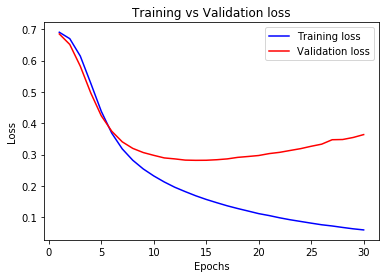

In [34]:
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']
val_loss = history_dict['val_loss']
loss = history_dict['loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

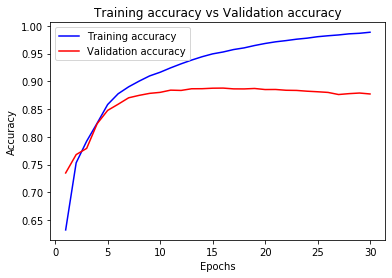

In [35]:
# clear figure
plt.clf()

plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the plots we can see that our model is clearly overfits the data. The big gap between two lines indicates that. From the first plot we can also see that the validation loss stops decreasing just after about 15 epochs or so but the training loss keeps decreasing which means that our model start learning some unwated patterns from our data.

### Exercise

Play with this example a little bit. Try to change the number of of dictionary, change size of validation set, change the optmizer from Adam to SGD, change the number of epochs, change the batch size. Plot the results and report them.

### Literature:  

1. https://www.tensorflow.org/guide/
2. https://pytorch.org/tutorials/
3. https://keras.io/
5. Grokking Deep Learning, Andrew W. Trask
6. Deep Learning with Python, FRANÇOIS CHOLLET - Best book about Keras from creator of Keras
7. Deep learning with PyTorch, Eli Stevens and Luca Antiga
8. Deep learning specialization, Coursera https://www.coursera.org/specializations/deep-learning
9. TensorFlow in Practice Specialization, Coursera https://www.coursera.org/specializations/tensorflow-in-practice